###**Question 1**
Consider the following Python module:



```
a = 0
def b():
 global a
 a = c(a)
def c(a):
 return a + 2
```


After importing the module into the interpreter, you execute:


```
>>> b()
>>> b()
>>> b()
>>> a
?
```


What value is displayed when the last expression (a) is evaluated? Explain your
answer by indicating what happens in every executed statement




### **Answer 1:**
Upon importing the module, we initialize a variable a to 0.

* The module defines a function b(), which takes no arguments. Inside this function, it refers to a as a global variable. The function b() changes the value of a by calling another function, c(a).

* The function c(a) takes one argument and returns the value of that argument plus 2.

* When we run b(), it calls c(a) with a being 0 (the initial value of a). The function c(a) adds 2 to a and returns 2. The result 2 is then assigned to the global variable a. Thus, after the first call of b(), a becomes 2.

* Now, when we run b() again, it calls c(a) with the updated value of a, which is 2. The function c(a) adds 2 to a and returns 4. This value 4 is assigned to the global variable a. Therefore, after the second call of b(), a turns into 4.

* On the third call to b(), it calls c(a) with a being 4 this time. The function c(a) adds 2 to a and returns 6. This value 6 is again assigned to the global variable a. Consequently, after the third call to b(), a is 6.

* In conclusion, after three calls to b(), the global variable a's value is updated to 6. So, when we evaluate a after these calls, it returns 6.






## **Question 2**
Function fileLength(), given to you, takes the name of a file as input and returns
the length of the file:

```
>>> fileLength('midterm.py')
284
>>> fileLength('idterm.py')
Traceback (most recent call last):
File "<pyshell#34>", line 1, in <module>
 fileLength('idterm.py')
File "/Users/me/midterm.py", line 3, in fileLength
 infile = open(filename)
FileNotFoundError: [Errno 2] No such file or directory:
'idterm.py'
```
As shown above, if the file cannot be found by the interpreter or if it cannot be read
as a text file, an exception will be raised. Modify function fileLength() so that a
friendly message is printed instead:
```
>>> fileLength('midterm.py')
358
>>> fileLength('idterm.py')
File idterm.py not found.
```




###**Answer 2:**

In Python, we can handle exceptions by using try and except blocks. The try block lets you test a block of code for errors, while the except block lets you handle the error.

Here's how you can modify the fileLength() function:

In [5]:
def file_length(file_name):
    try:
        file = open(file_name)
        contents = file.read()
        file.close()
        print(len(contents))
    except FileNotFoundError:
        print(f'File {file_name} not found.')
file_length('Mid_term.txt')
file_length('idterm.py')

125
File idterm.py not found.


## ***Question 3***
Write a class named Marsupial that can be used as shown below:



```

>>> m = Marsupial()
>>> m.put_in_pouch('doll')
>>> m.put_in_pouch('firetruck')
>>> m.put_in_pouch('kitten')
>>> m.pouch_contents()
['doll', 'firetruck', 'kitten']
```


Now write a class named Kangaroo as a subclass of Marsupial that inherits all the
attributes of Marsupial and also:
a. extends the Marsupial _init_ constructor to take, as input, the
coordinates x and y of the Kangaroo object,
b. supports method jump that takes number values dx and dy as input and
moves the kangaroo by dx units along the x-axis and by dy units along the y-axis, and
c. overloads the _str_ operator so it behaves as shown below.



```
>>> k = Kangaroo(0,0)
>>> print(k)
I am a Kangaroo located at coordinates (0,0)
>>> k.put_in_pouch('doll')
>>> k.put_in_pouch('firetruck')
>>> k.put_in_pouch('kitten')
>>> k.pouch_contents()
['doll', 'firetruck', 'kitten']
>>> k.jump(1,0)
>>> k.jump(1,0)
>>> k.jump(1,0)
>>> print(k)
I am a Kangaroo located at coordinates (3,0)
```





###**Answer 3**

Here is the code that accomplishes the requested functionality:

In [11]:
class Marsupial:
    def __init__(self):
        self.pouch = []

    def put_in_pouch(self, item):
        self.pouch.append(item)

    def pouch_contents(self):
        return self.pouch

class Kangaroo(Marsupial):
    def __init__(self, x, y):
        Marsupial.__init__(self)
        self.x = x
        self.y = y

    def jump(self, dx, dy):
        self.x += dx
        self.y += dy

    def __str__(self):
        return f"I am a Kangaroo located at coordinates ({self.x},{self.y})"


m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
print(m.pouch_contents())

k = Kangaroo(0,0)
print(k)
k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
print(k.pouch_contents())
k.jump(1,0)
k.jump(1,0)
k.jump(1,0)
print(k)

['doll', 'firetruck', 'kitten']
I am a Kangaroo located at coordinates (0,0)
['doll', 'firetruck', 'kitten']
I am a Kangaroo located at coordinates (3,0)


###**Question 4**

Write function collatz() that takes a positive integer x as input and prints the
Collatz sequence starting at x. A Collatz sequence is obtained by repeatedly applying
this rule to the previous number x in the sequence:


```
x = {
𝑥/2 𝑖𝑓 𝑥 𝑖𝑠 𝑒𝑣𝑒𝑛
3𝑥 + 1 𝑖𝑓 𝑥 𝑖𝑠 𝑜𝑑𝑑 }
```




Your function should stop when the sequence gets to number 1. Your
implementation must be recursive, without any loops.



```
>>> collatz(1)
1
>>> collatz(10)
10
5
16
8
4
2
1
```





###**Answer 4**


The Collatz sequence is a sequence of numbers where each next number in the sequence is obtained from the previous number using the following rules:

If the previous number is even, the next number is one half of the previous number.
If the previous number is odd, the next number is 3 times the previous number plus 1.
The sequence ends when it reaches 1.

Here's a Python function collatz() that generates a Collatz sequence using recursion, as you specified. The function prints each number in the sequence, and makes a recursive call with the next number in the sequence until it reaches 1.

In [18]:
def collatz(x):
    print(x)
    # base case: if x is 1, we're done
    if x == 1:
        return
    # recursive case: if x is even, divide it by 2
    elif x % 2 == 0:
        collatz(x // 2)
    # recursive case: if x is odd, multiply it by 3 and add 1
    else:
        collatz(3*x + 1)

collatz(1)
collatz(10)

1
10
5
16
8
4
2
1


###**Question 5**

Write a recursive method binary() that takes a non-negative
integer n and prints the binary representation of integer n.



```
>>> binary(0)
0
>>> binary(1)
1
>>> binary(3)
11
>>> binary(9)
1001
```




###**Answer 5**
The binary representation of an integer can be found using a recursive method. The binary representation of a non-negative integer n is:

'0' if n is 0 '1' if n is 1 The binary representation of n // 2 followed by n % 2 if n > 1 Here is the recursive function binary() in Python:

In [20]:
def binary(n):
    if n == 0:
        return '0'
    elif n == 1:
        return '1'
    else:
        return binary(n // 2) + str(n % 2)
        print(binary(n))
        print(binary(0))  # prints '0'
print(binary(1))  # prints '1'
print(binary(3))  # prints '11'
print(binary(9))  # prints '1001'

1
11
1001


This function first checks whether the given number n is 0 or 1, in which case it returns a string representation of the number. Otherwise, it performs a recursive call to compute the binary representation of the integer division of n by 2, and then appends the result of n modulo 2.

###**Question 6**

Implement a class named HeadingParser that can be used to parse an HTML
document, and retrieve and print all the headings in the document. You should
implement your class as a subclass of HTMLParser, defined in Standard Library
module html.parser. When fed a string containing HTML code, your class should
print the headings, one per line and in the order in which they appear in the
document. Each heading should be indented as follows: an h1 heading should have indentation 0, and h2 heading should have indentation 1, etc. Test your
implementation using w3c.html.



```
>>> infile = open('w3c.html')
>>> content = infile.read()
>>> infile.close()
>>> hp = HeadingParser()
>>> hp.feed(content)
W3C Mission
Principles
```




###**Answer 6**

First, ensure that you have the HTMLParser module installed. This module provides classes for parsing HTML text. We can create a custom parser by subclassing HTMLParser and overriding its methods.

The starttag method is called for each start tag in the input text. By checking if the tag is one of the heading tags, we can extract the heading level and store it for later use.

The handle_data method is called for each chunk of text data in the input text. When we are in a heading, this will be the text of the heading, so we print it with appropriate indentation.

Here's the code that accomplishes the task:

In [23]:
from html.parser import HTMLParser

class HeadingParser(HTMLParser):
    def __init__(self):
        super().__init__()
        self.in_heading = False
        self.indent = 0

    def handle_starttag(self, tag, attrs):
        if tag in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']:
            self.in_heading = True
            self.indent = int(tag[1]) - 1

    def handle_endtag(self, tag):
        if tag in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']:
            self.in_heading = False

    def handle_data(self, data):
        if self.in_heading:
            print(' ' * self.indent + data)

# read file content
with open('w3c.html', 'r') as f:
    content = f.read()

hp = HeadingParser()
hp.feed(content)


W3C Mission
 Principles


###**Question 7**

Implement recursive function webdir() that takes as input: a URL (as a string) and
non-negative integers depth and indent. Your function should visit every web
page reachable from the starting URL web page in depth clicks or less, and print
each web page's URL. As shown below, indentation, specified by indent, should
be used to indicate the depth of a URL.


```

>>>
webdir('http://reed.cs.depaul.edu/lperkovic/csc242/test1.html'
, 2, 0)
http://reed.cs.depaul.edu/lperkovic/csc242/test1.html
 http://reed.cs.depaul.edu/lperkovic/csc242/test2.html
 http://reed.cs.depaul.edu/lperkovic/csc242/test4.html
 http://reed.cs.depaul.edu/lperkovic/csc242/test3.html
 http://reed.cs.depaul.edu/lperkovic/csc242/test4.html

```




###**Answer 7**


Here's a Python script implementing the webdir() function as per your requirements. This script uses the requests library to make HTTP requests, the BeautifulSoup library to parse HTML responses, and the urljoin function to resolve relative URLs.

It's important to note that this function might generate a lot of traffic for websites and could potentially lead to your IP being blocked. You should respect the website's robots.txt and terms of service while running such functions.

In [24]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# Recursive function to visit and print web pages' URLs
def webdir(url, depth, indent):
    # Base case: if depth is less than 0, we stop
    if depth < 0:
        return

    # Indent and print the URL
    print(' ' * indent, url)

    try:
        # Send a GET request to the URL
        response = requests.get(url)
        # Parse the HTML response
        soup = BeautifulSoup(response.text, 'html.parser')

        # For each <a> tag with an href attribute in the parsed HTML
        for a_tag in soup.find_all('a', href=True):
            href = a_tag['href']

            # If the href is an absolute URL
            if href.startswith('http'):
                # Recursively call webdir() with the new URL, decreased depth and increased indent
                webdir(href, depth-1, indent+1)
            else:
                # If the href is a relative URL, join it with the base URL
                next_url = urljoin(url, href)
                # Recursively call webdir() with the new URL, decreased depth and increased indent
                webdir(next_url, depth-1, indent+1)

    except Exception as e:
        # In case of exceptions, print an error message
        print(' ' * indent, 'Error:', e)

# Call the function with the initial URL, depth and indent
webdir('http://reed.cs.depaul.edu/lperkovic/csc242/test1.html', 2, 0)

 http://reed.cs.depaul.edu/lperkovic/csc242/test1.html


###**Question 8**

Write SQL queries on the below database table that return:

a) All the temperature data.

b) All the cities, but without repetition.

c) All the records for India.

d) All the Fall records.

e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.

f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.


g) The total annual rainfall for Cairo.

h) The total rainfall for each season


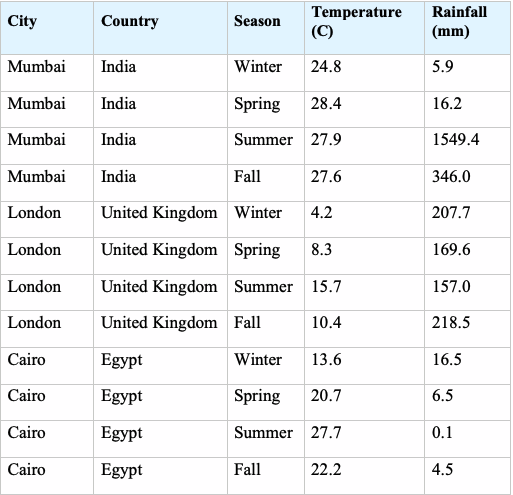


###**Answer 8**

The SQL queries for the above tasks would be as follows, assuming your table name is "Weather":

a) All the temperature data.


```
SELECT Temperature FROM Weather;
```
b) All the cities, but without repetition.


```
SELECT DISTINCT City FROM Weather;
```
c) All the records for India.


```
SELECT * FROM Weather WHERE Country = 'India';
```
d) All the Fall records.


```
SELECT * FROM Weather WHERE Season = 'Fall';
```
e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.


```
SELECT City, Country, Season FROM Weather
WHERE Rainfall BETWEEN 200 AND 400;
```
f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.

```
SELECT City, Country FROM Weather
WHERE Season = 'Fall' AND Temperature > 20
ORDER BY Temperature;
```
g) The total annual rainfall for Cairo.



```
SELECT SUM(Rainfall) as AnnualRainfall FROM Weather
WHERE City = 'Cairo';
```
h) The total rainfall for each season.


```
SELECT Season, SUM(Rainfall) as TotalRainfall FROM Weather
GROUP BY Season;
```


















###**Question 9**

. Suppose list words is defined as follows:


```
>>> words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over',
'the', 'lazy', 'dog']
```

Write list comprehension expressions that use list words and generate the following lists:

a) ['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE',
'LAZY', 'DOG']

b) ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the',
'lazy', 'dog']

c) [3, 5, 5, 3, 5, 4, 3, 4, 3] (the list of lengths of words in list words).

d) [['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN',
'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5],
['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy',
4], ['DOG', 'dog', 3]] (the list containing a list for every word of list
words, where each list contains the word in uppercase and lowercase and the
length of the word.)

e) ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the',
'lazy', 'dog'] (the list of words in list words containing 4 or more
characters.)

###**Answer 9**

Here are the list comprehension expressions for each part of the question:


In [26]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

# a)
upper_case_words = [word.upper() for word in words]
print(upper_case_words)

# b)
lower_case_words = [word.lower() for word in words]
print(lower_case_words)

# c)
length_of_words = [len(word) for word in words]
print(length_of_words)

# d)
words_details = [[word.upper(), word.lower(), len(word)] for word in words]
print(words_details)

# e)
four_or_more_chars = [word for word in words if len(word) >= 4]
print(four_or_more_chars)

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']
['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
[3, 5, 5, 3, 5, 4, 3, 4, 3]
[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]
['quick', 'brown', 'jumps', 'over', 'lazy']
